In [1]:
import pandas as pd
data = pd.read_csv('IRIS.csv')

In [2]:
data.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def outliers(str,column):
  plt.figure(figsize=(10,8))
  sns.boxplot(y=data[column])
  plt.title(f'Boxplot of {column} {str}')
  plt.show()

Before Outlier


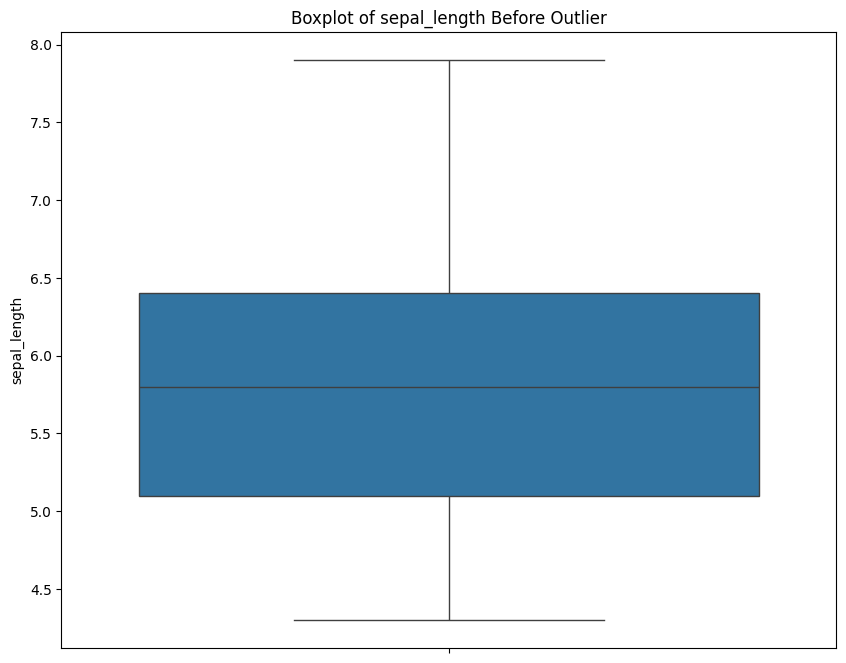

After Outlier


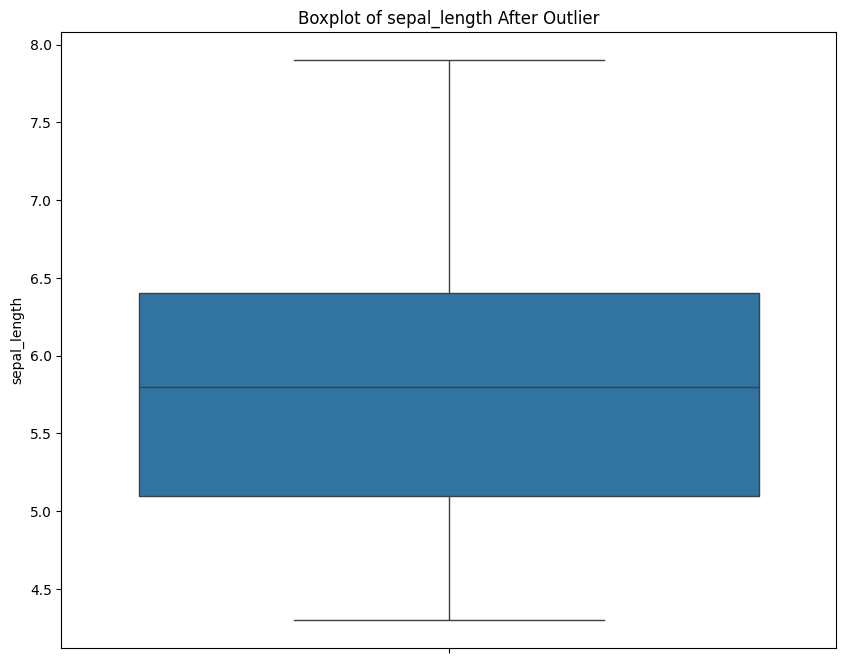

Before Outlier


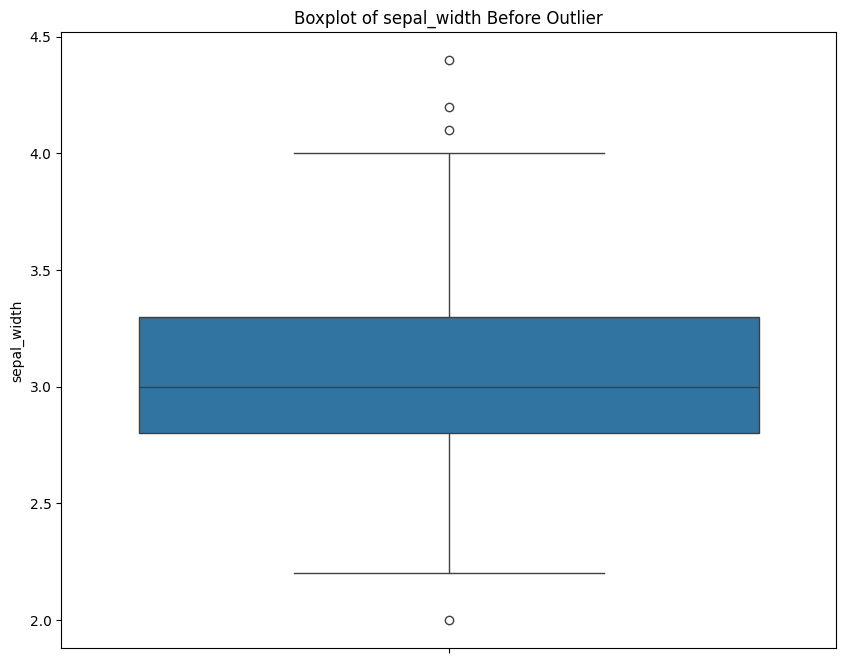

After Outlier


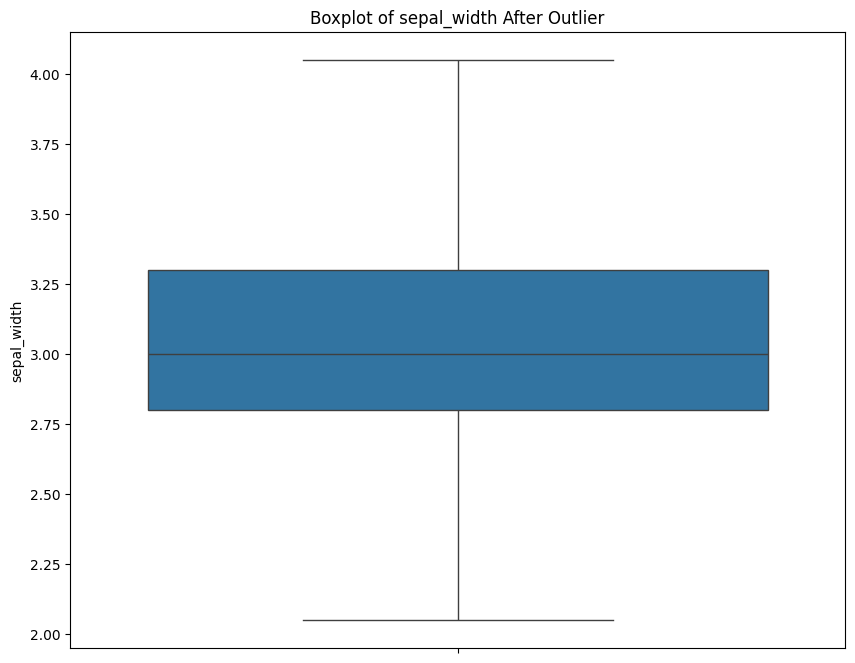

Before Outlier


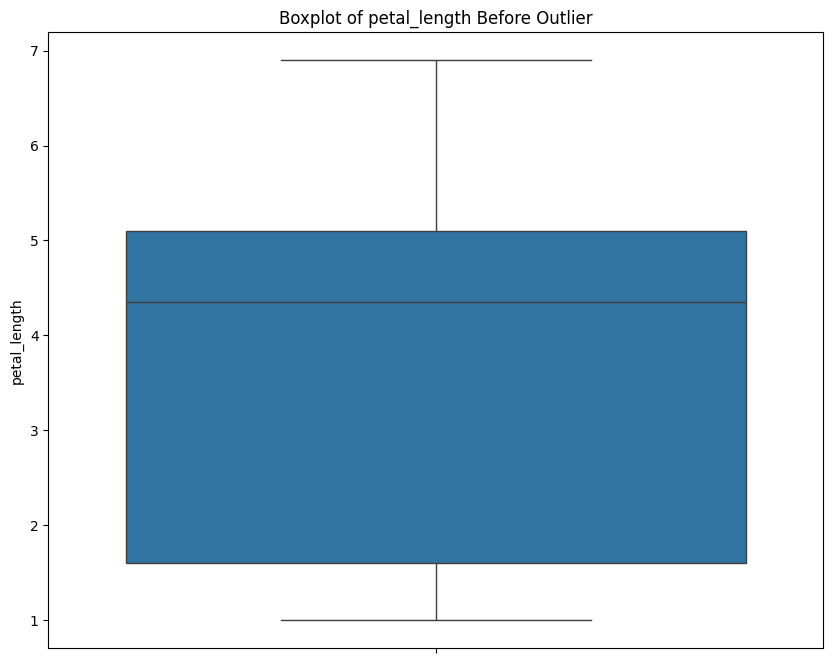

After Outlier


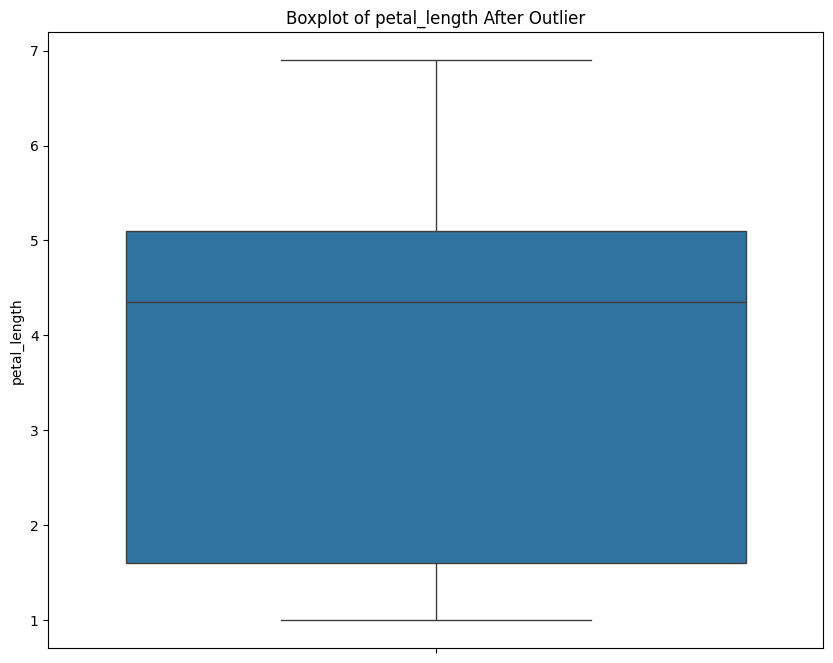

Before Outlier


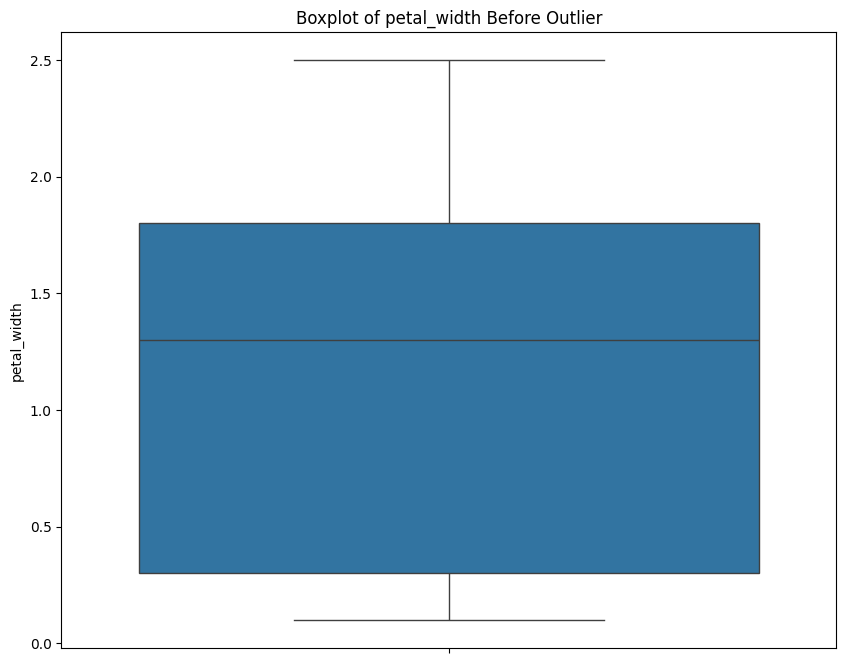

After Outlier


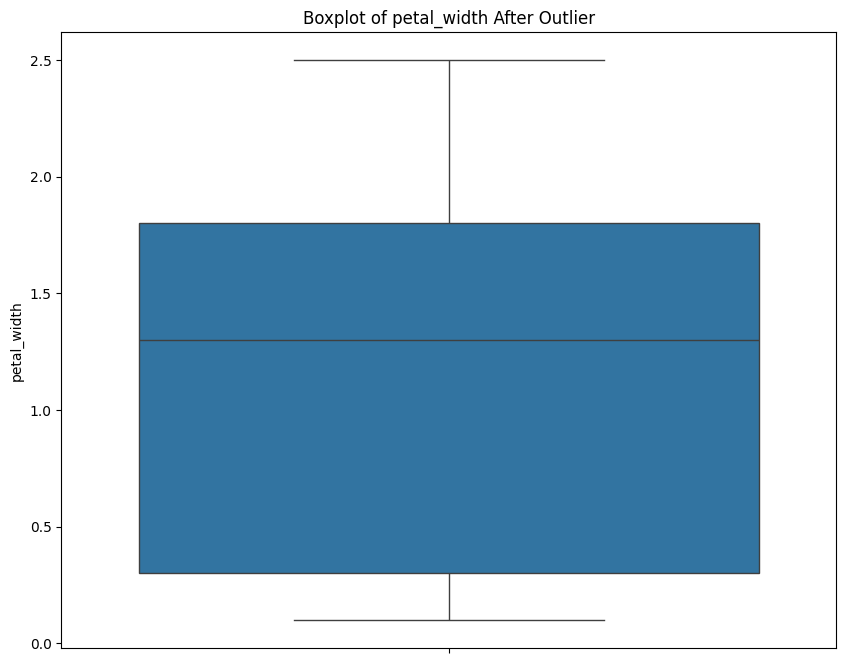

In [5]:
for column in data:

  if data[column].dtype == 'float64':

    print(f"Before Outlier")
    outliers('Before Outlier',column)

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    data.loc[data[column] > upper_limit, column] = upper_limit
    data.loc[data[column] < lower_limit, column] = lower_limit

    print(f"After Outlier")
    outliers('After Outlier',column)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay,precision_recall_curve, roc_curve, roc_auc_score,auc
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [8]:
encoding= {}
encoder = LabelEncoder()

for column in data:
  if data.dtypes[column] == 'object':
    data[column] = data[column].astype(str)
    data[column] = encoder.fit_transform(data[column])
    encoding[column] = dict(zip(map(str.lower,encoder.classes_),encoder.transform(encoder.classes_)))
    print(f"{column} : {encoding[column]}")


species : {'iris-setosa': 0, 'iris-versicolor': 1, 'iris-virginica': 2}


In [9]:
def val(column,value):
  return encoding[column][value]

In [10]:
X = data.drop('species',axis=1)
y = data['species']


In [11]:
scaler = StandardScaler()

In [12]:
X = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [16]:
sepal_length = input("Enter sepal_length : ")
sepal_width = input("Enter sepal_width : ")
petal_length = input("Enter petal_length : ")
petal_width = input("Enter petal_width : ")

Enter sepal_length : 5.2
Enter sepal_width : 3.4
Enter petal_length : 1.4
Enter petal_width : 0.2


In [17]:
new_input = scaler.transform(pd.DataFrame([[sepal_length,sepal_width,petal_length,petal_width]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
new_pred = rf_model.predict(new_input)

In [19]:
class_labels = ['iris-setosa', 'iris-versicolor', 'iris-virginica']

In [20]:
predicted_labels = [class_labels[prediction] for prediction in new_pred]

In [21]:
print(predicted_labels)

['iris-setosa']
